<a href="https://colab.research.google.com/github/vitor-freitas1/challenge-telecom-x-churn-part2/blob/main/challenge_telecom_x_churn_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🛠️ 1. Preparação dos dados

## 1.1 Extração do Arquivo Tratado

In [1]:
# Import de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# URL do arquivo CSV "Raw" do GitHub
url_dados = 'https://raw.githubusercontent.com/vitor-freitas1/challenge-telecom-x-churn/refs/heads/main/Dados/dados_tratados.csv'

# Carregando os dados diretamente da URL
try:
    df_tratado = pd.read_csv(url_dados)
    print("Arquivo 'dados_tratados.csv' carregado com sucesso diretamente do GitHub!")
except Exception as e:
    print(f"Erro ao carregar os dados da URL: {e}")
    print("Verifique se a URL está correta e se o arquivo existe no repositório.")


# Visualização das 5 primeiras linhas junto da estrutura dos dados
if 'df_tratado' in locals():
    print("\n5 primeiras linhas do DataFrame:")
    display(df_tratado.head())

    print ("\nInformações gerais do DataFrame:")
    df_tratado.info()

Arquivo 'dados_tratados.csv' carregado com sucesso diretamente do GitHub!

5 primeiras linhas do DataFrame:


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.155236
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.967967
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.427926
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.219713
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.756468



Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   int64  
 5   customer_Dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   int64  
 8   phone_MultipleLines        7043 non-null   int64  
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   int64  
 11  internet_OnlineBackup      7043 non-null   int64  
 12  internet_DeviceProtection  7043 non-null   int64  
 13  internet_TechS

## 1.2 Remoção de Colunas Irrelevantes

In [2]:
# Visualização de colunas atuais
print("Colunas antes da remoção:")
print(df_tratado.columns.tolist())
print(f"\nNúmero de colunas antes: {df_tratado.shape[1]}")

# Removendo a coluna de identificação de cliente
df_tratado = df_tratado.drop('customerID', axis=1)

# Confirmando a remoção
print("\n-------------------------------------------")
print("Coluna 'customerID' removida com sucesso!")
print("-------------------------------------------")

print("\nColunas após a remoção:")
print(df_tratado.columns.tolist())
print(f"\nNúmero de colunas agora: {df_tratado.shape[1]}")

Colunas antes da remoção:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total', 'Contas_Diarias']

Número de colunas antes: 22

-------------------------------------------
Coluna 'customerID' removida com sucesso!
-------------------------------------------

Colunas após a remoção:
['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_Tech

## 1.3 Encoding

In [3]:
# Criação de uma cópia do DataFrame, por garantia.
df_encoded = df_tratado.copy()

# identificando as colunas categóricas que ainda não são numéricas
colunas_categoricas = df_encoded.select_dtypes(include=['object']).columns.tolist()

print("Colunas categóricas a serem transformadas:", colunas_categoricas)
print(f"\nNúmero de colunas antes do encoding: {df_encoded.shape[1]}")

# Aplicando one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=colunas_categoricas, drop_first=True, dtype=int)

# Exibindo o resultado
print(f"\nNúmero de colunas após o encoding: {df_encoded.shape[1]}")
print("\nAs 5 primeiras linhas do DataFrame transformado:")
display(df_encoded.head())

print("\nTipos de dados após a transformação:")
df_encoded.info()

Colunas categóricas a serem transformadas: ['customer_gender', 'internet_InternetService', 'account_Contract', 'account_PaymentMethod']

Número de colunas antes do encoding: 21

Número de colunas após o encoding: 25

As 5 primeiras linhas do DataFrame transformado:


,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,...,account_Charges_Total,Contas_Diarias,customer_gender_Male,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,593.30,2.155236,0,0,0,1,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,542.40,1.967967,1,0,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,280.85,2.427926,1,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,1237.85,3.219713,1,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,267.40,2.756468,0,1,0,0,0,0,0,1



Tipos de dados após a transformação:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   int64  
 1   customer_SeniorCitizen                         7043 non-null   int64  
 2   customer_Partner                               7043 non-null   int64  
 3   customer_Dependents                            7043 non-null   int64  
 4   customer_tenure                                7043 non-null   int64  
 5   phone_PhoneService                             7043 non-null   int64  
 6   phone_MultipleLines                            7043 non-null   int64  
 7   internet_OnlineSecurity                        7043 non-null   int64  
 8   internet_OnlineBackup                          7043 non-null   int64  
 9   internet_Devic

## 1.4 Verificação da Proporção de Evasão

Contagem de clientes por classe de Churn:
Churn
0    5174
1    1869
Name: count, dtype: int64

Lembrete: 0 = Não Churn (Permaneceu), 1 = Churn (Evadiu)

Proporção de clientes por classe de Churn (em porcentagem):
Churn
0    73.46
1    26.54
Name: proportion, dtype: float64

--- Avaliação do Desequilíbrio ---
Há um desequilíbrio notável entre as classes. A classe majoritária (Não Churn) representa 73.5% do total.
Isso deve ser levado em conta na avaliação dos modelos.


/tmp/ipython-input-4-2660629752.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_encoded, palette='pastel')


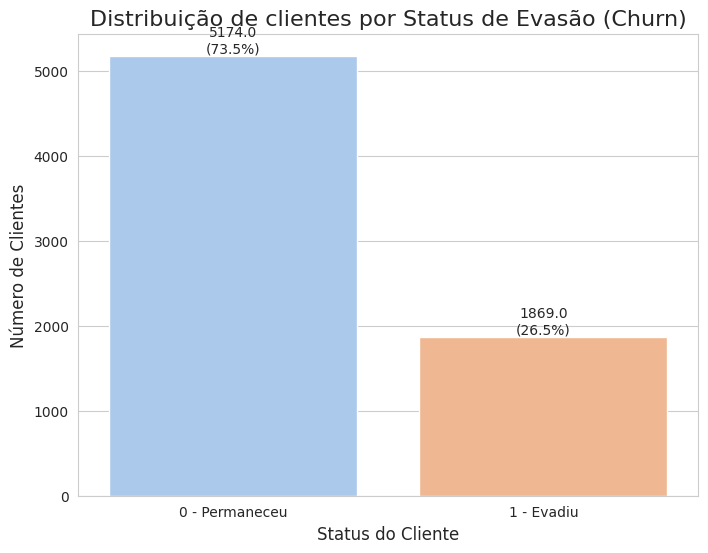

In [4]:
# Verificando a contagem de cada classe na coluna 'Churn'
contagem_churn = df_encoded['Churn'].value_counts()
print("Contagem de clientes por classe de Churn:")
print(contagem_churn)
print("\nLembrete: 0 = Não Churn (Permaneceu), 1 = Churn (Evadiu)")

# Calculando a proporção em porcentagem
proporcao_churn = df_encoded['Churn'].value_counts(normalize=True) * 100
print("\nProporção de clientes por classe de Churn (em porcentagem):")
print(proporcao_churn.round(2))

# Avaliação de desequilíbrio
print ("\n--- Avaliação do Desequilíbrio ---")
if abs(proporcao_churn[0] - proporcao_churn[1]) > 20:
    print("Há um desequilíbrio notável entre as classes. A classe majoritária (Não Churn) representa "
          f"{proporcao_churn[0]:.1f}% do total.")
    print("Isso deve ser levado em conta na avaliação dos modelos.")
else:
    print("O desequilíbrio entre as classes é moderado.")

# Visualização da proporção com um gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df_encoded, palette='pastel')
plt.title('Distribuição de clientes por Status de Evasão (Churn)', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Evadiu'])

# Adicionando os rótulos de contagem e porcentagem
total = len(df_encoded['Churn'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height +3,
            f'{height}\n({(height/total)*100:.1f}%)',
            ha="center", va='bottom')

plt.show()

## 1.5 Normalização ou Padronização

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Usado o df_encoded que foi gerado na etapa de encoding
df_para_escalar = df_encoded.copy()

# --------------------------------------------------------------------------
# PASSO 1: Separação da variável alvo (Churn) das features (preditores)
# --------------------------------------------------------------------------
# A normalização só é aplicada nas features que usarão para prever.
X = df_para_escalar.drop('Churn', axis=1)
y = df_para_escalar['Churn'] # Alvo permanece o mesmo (0s e 1s)

print("Shape das features (X) antes de escalar:", X.shape)
print("Shape do alvo (y):", y.shape)

# --------------------------------------------------------------------------
# PASSO 2: Aplicação da normalização
# --------------------------------------------------------------------------
# Criando o objeto scaler
scaler = MinMaxScaler()

# Aplicando a normalização nas features (X)
# O método fit_transform aprende os parâmetros (min/max) e transforma os dados
X_scaled = scaler.fit_transform(X)

# --------------------------------------------------------------------------
# PASSO 3: Reconstrução do DataFrame para manter a organização
# --------------------------------------------------------------------------
# A saída do scaler é um array NumPy, que será convertido de volta para um
# DataFrame para manter os nomes das colunas, facilitando a análise de
# correlação
df_final = pd.DataFrame(X_scaled, columns=X.columns)

# Exibindo o resultado da normalização
print("\n--- Dados Após a Normalização ---")
print("As 5 primeiras linhas dos dados normalizados:")
display(df_final.head())

print("\nEstatísticas descritivas ('min' é 0 e 'max' é 1 para todas as colunas):")
display(df_final.describe().round(2))

Shape das features (X) antes de escalar: (7043, 24)
Shape do alvo (y): (7043,)

--- Dados Após a Normalização ---
As 5 primeiras linhas dos dados normalizados:


,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,...,account_Charges_Total,Contas_Diarias,customer_gender_Male,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0.0,1.0,1.0,0.125000,1.0,0.0,0.0,1.0,0.0,1.0,...,0.068315,0.471144,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.125000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.062454,0.414428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.055556,1.0,0.0,0.0,0.0,1.0,0.0,...,0.032338,0.553731,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.180556,1.0,0.0,0.0,1.0,1.0,0.0,...,0.142531,0.793532,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.041667,1.0,0.0,0.0,0.0,0.0,1.0,...,0.030789,0.653234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0



Estatísticas descritivas ('min' é 0 e 'max' é 1 para todas as colunas):


,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,...,account_Charges_Total,Contas_Diarias,customer_gender_Male,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
count,7043.00,7043.00,7043.00,7043.00,7043.0,7043.00,7043.00,7043.00,7043.00,7043.00,...,7043.00,7043.00,7043.0,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.16,0.48,0.30,0.45,0.9,0.42,0.29,0.34,0.34,0.29,...,0.26,0.46,0.5,0.44,0.22,0.21,0.24,0.22,0.34,0.23
std,0.37,0.50,0.46,0.34,0.3,0.49,0.45,0.48,0.48,0.45,...,0.26,0.30,0.5,0.50,0.41,0.41,0.43,0.41,0.47,0.42
min,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.12,1.0,0.00,0.00,0.00,0.00,0.00,...,0.05,0.17,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.40,1.0,0.00,0.00,0.00,0.00,0.00,...,0.16,0.52,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,1.00,1.00,0.76,1.0,1.00,1.00,1.00,1.00,1.00,...,0.44,0.71,1.0,1.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# 🎯 2. Correlação e Seleção de Variáveis

## 2.1 Separação dos Dados

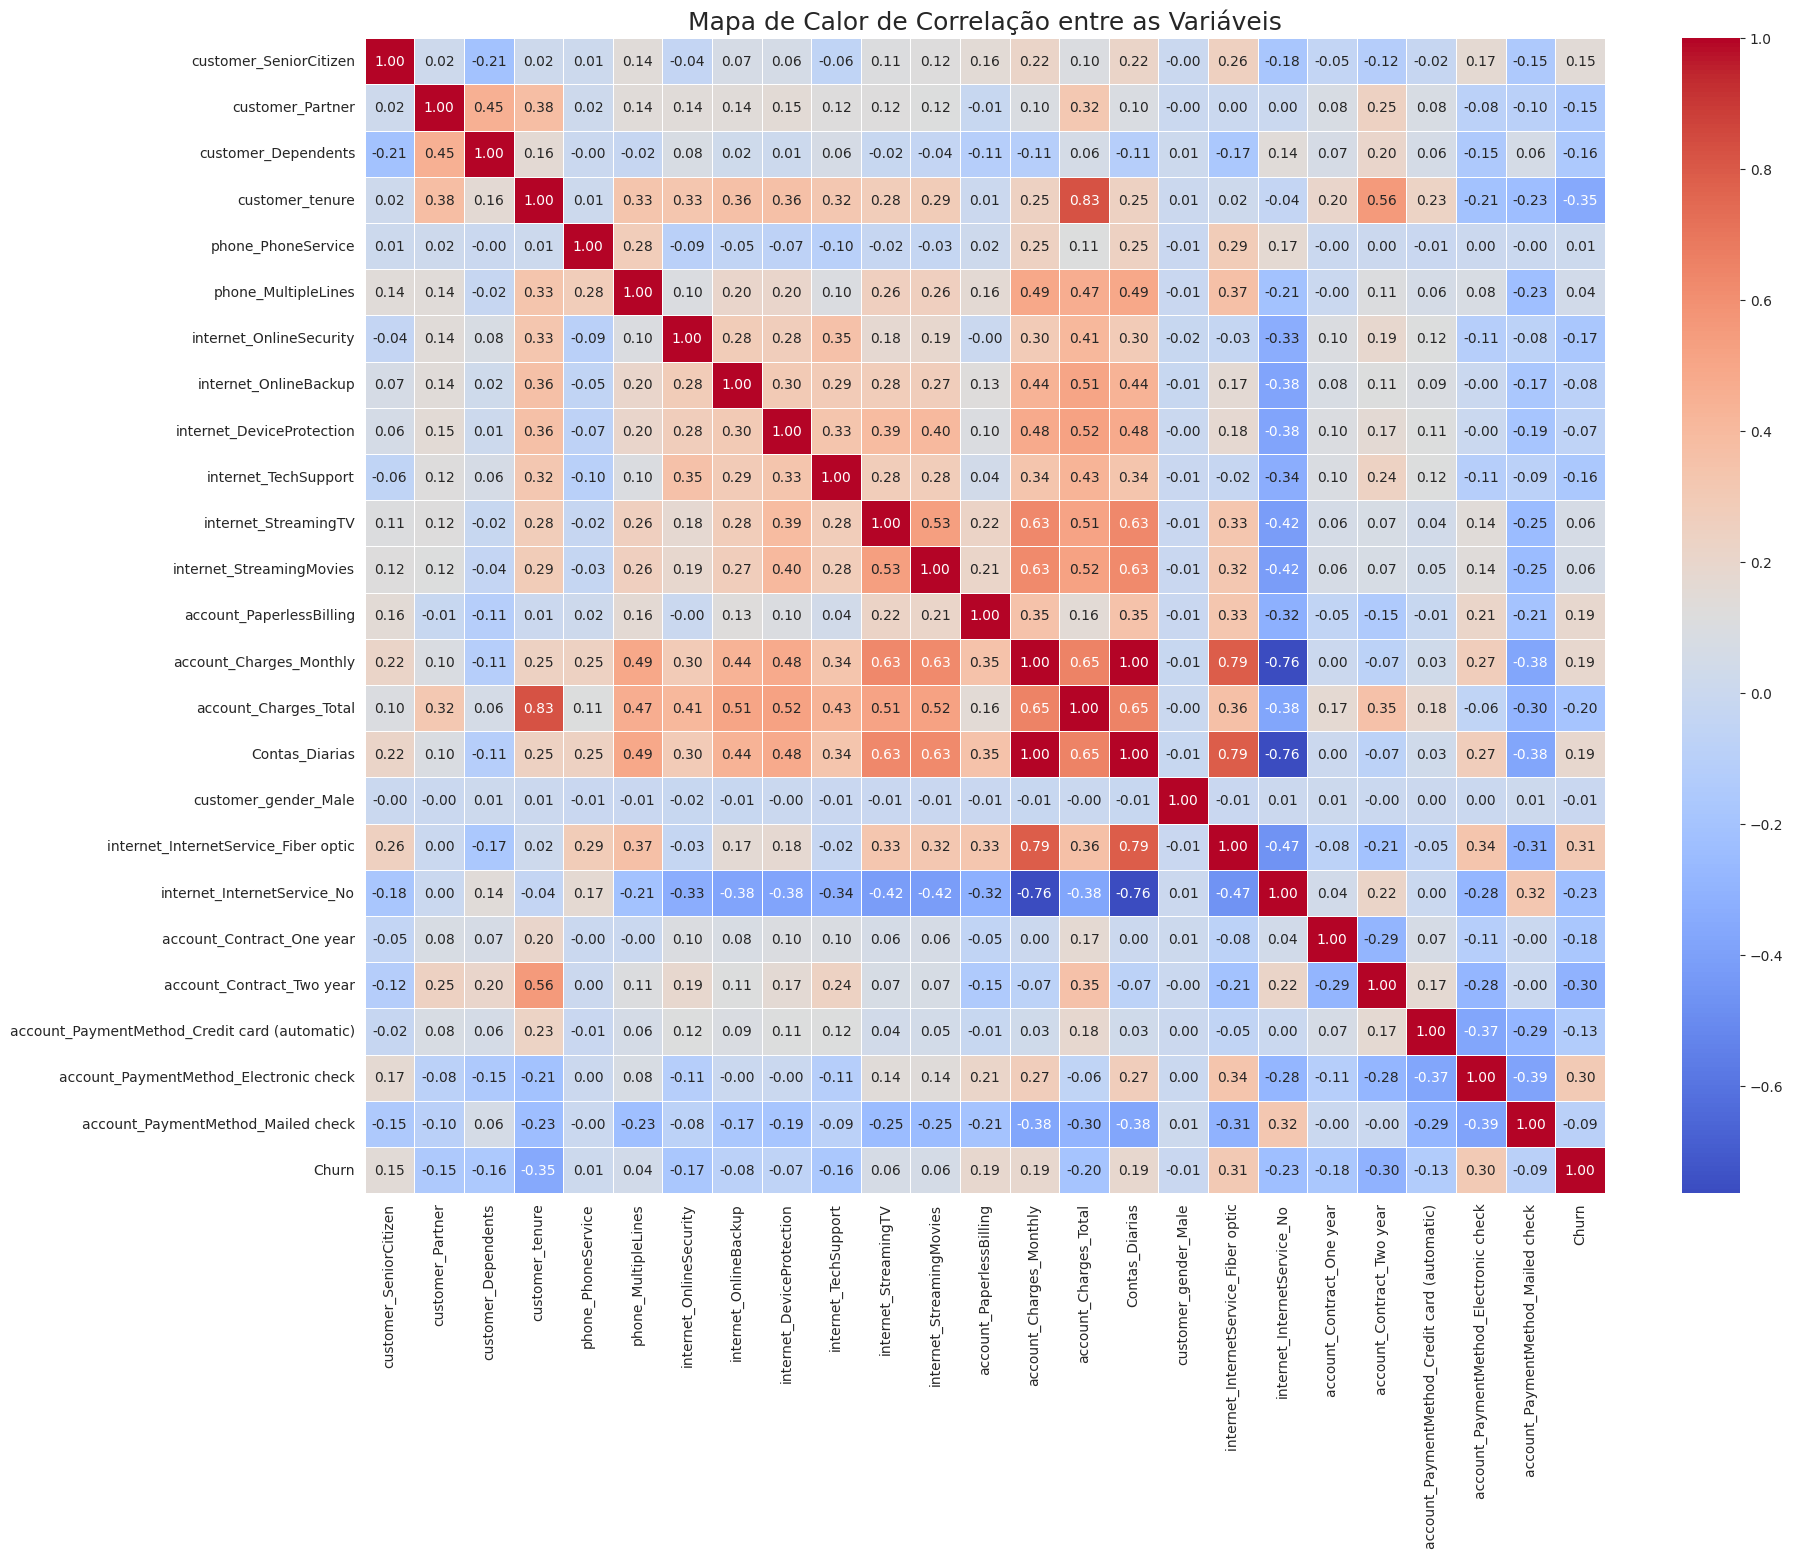

In [6]:
# Juntando as features normalizadas (X_scaled_df ou df_final) e o alvo (y)
# para a análise de correlação completa.
df_para_corr = pd.concat([df_final, y], axis=1)

# Calculando a matriz de correlação
corr_matrix = df_para_corr.corr()

# Criando o mapa de calor (heatmap) para visualizar a matriz
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix,
            annot=True,      # Exibe os valores de correlação no mapa
            cmap='coolwarm', # Esquema de cores (vermelho=positivo, azul=negativo)
            fmt='.2f',       # Formata os números para duas casas decimais
            linewidths=.5)
plt.title('Mapa de Calor de Correlação entre as Variáveis', fontsize=18)
plt.show()

## 2.2 Análises Direcionadas

### 2.2.1 Tempo de Contrato x Evasão

/tmp/ipython-input-7-4087241998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer_tenure', data=df_encoded, palette='pastel')


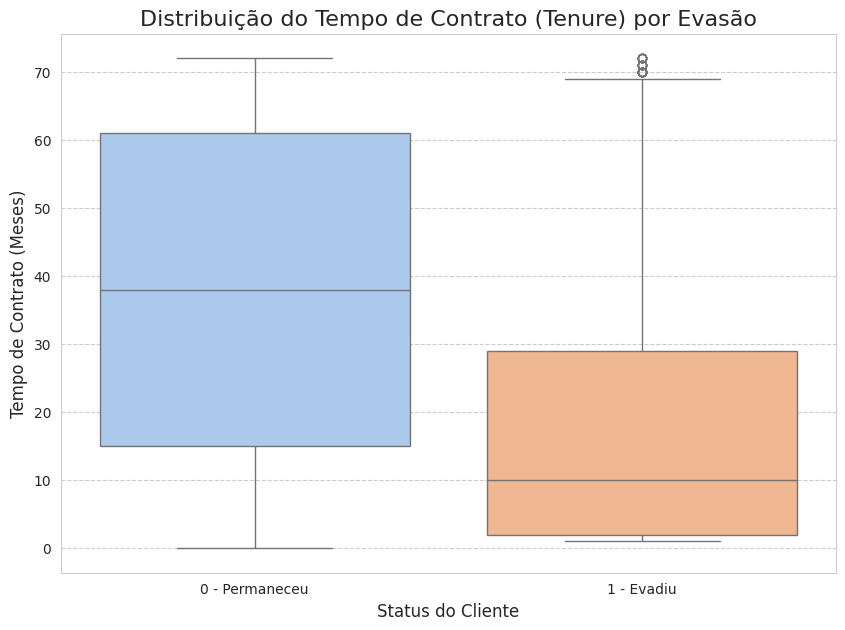

In [7]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='customer_tenure', data=df_encoded, palette='pastel')
plt.title('Distribuição do Tempo de Contrato (Tenure) por Evasão', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Tempo de Contrato (Meses)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Evadiu'])
plt.grid(axis='y', linestyle='--')
plt.show()

### 2.2.2 Total Gasto x Evasão

/tmp/ipython-input-8-4216588851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account_Charges_Total', data=df_encoded, palette='pastel')


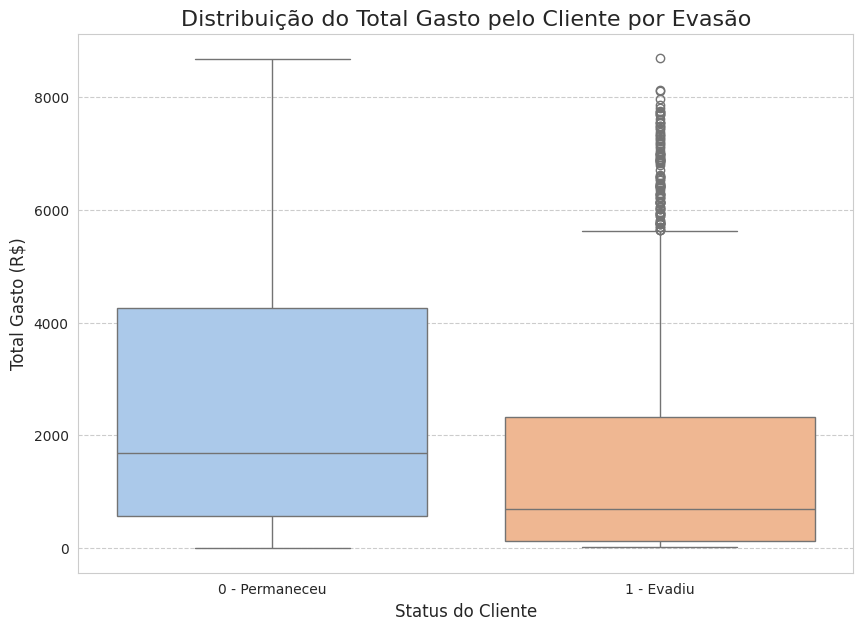

In [8]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn', y='account_Charges_Total', data=df_encoded, palette='pastel')
plt.title('Distribuição do Total Gasto pelo Cliente por Evasão', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Total Gasto (R$)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Evadiu'])
plt.grid(axis='y', linestyle='--')
plt.show()

# 🤖 3. Modelagem Preditiva

## 3.1 Separação dos Dados

In [9]:
from sklearn.model_selection import train_test_split

# Os dados finais e prontos para modelagem são:
# X = df_final (features pré-processadas e normalizadas da etapa anterior)
# y = y (A variável alvo 'Churn')

# Dividindo os dados em 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X,                # As features (preditores)
    y,                # A variável alvo
    test_size=0.3,    # Proporção dos dados para o conjunto de teste (30%)
    random_state=42,  # Garante que a divisão seja sempre a mesma ao rodar o código
    stratify=y        # Essencial para manter a proporção de Churn nos dois conjuntos
)

# Verificando as dimensões (shapes) dos conjuntos criados
print("--- Dimensões dos Conjuntos de Dados ---")
print(f"Shape de X_train (features de treino): {X_train.shape}")
print(f"Shape de X_test (features de teste):  {X_test.shape}")
print(f"Shape de y_train (alvo de treino):     {y_train.shape}")
print(f"Shape de y_test (alvo de teste):      {y_test.shape}")

# Verificando a proporção da variável alvo para confirmar a estratificação
print("\n--- Verificação da Estratificação (Proporção de Churn) ---")
print("Proporção no y_train (%):")
print(round(y_train.value_counts(normalize=True) * 100, 2))
print("\nProporção no y_test (%):")
print(round(y_test.value_counts(normalize=True) * 100, 2))

--- Dimensões dos Conjuntos de Dados ---
Shape de X_train (features de treino): (4930, 24)
Shape de X_test (features de teste):  (2113, 24)
Shape de y_train (alvo de treino):     (4930,)
Shape de y_test (alvo de teste):      (2113,)

--- Verificação da Estratificação (Proporção de Churn) ---
Proporção no y_train (%):
Churn
0    73.47
1    26.53
Name: proportion, dtype: float64

Proporção no y_test (%):
Churn
0    73.45
1    26.55
Name: proportion, dtype: float64


## 3.2 Criação de Modelos

### 3.2.1 Modelo 01: Regressão Logística

#### 3.2.1.1 Justificativa:

Escolhida a Regressão Logística como ponto de partida. É um modelo clássico, rápido e direto ao ponto. Ele é ótimo para criar uma primeira referência (baseline) de performance e ajuda a entender o peso de cada característica na decisão de um cliente cancelar o serviço

#### 3.2.1.2 Necessidade de Normalização?

Sim, este modelo é sensível à escala das variáveis. A normalização é importante para que ele funcione corretamente, garantindo que nenhuma característica domine a análise apenas por ter números maiores

In [10]:
# Importando o modelo e as métricas de avaliação
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instanciar o modelo
log_reg = LogisticRegression(random_state=42, solver='liblinear')

# Treinar o modelo com os dados de treino
print("Treinando o modelo de Regressão Logística com solver 'liblinear'...")
log_reg.fit(X_train, y_train)
print("Treinamento concluído!")

# Fazer previsões com os dados de teste
y_pred_log_reg = log_reg.predict(X_test)

# Avaliar a performance do modelo
print("\n--- Resultados da Regressão Logística no Conjunto de Teste ---")
accuracy_log = accuracy_score(y_test, y_pred_log_reg)
print(f"Acurácia: {accuracy_log * 100:.2f}%")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg))

Treinando o modelo de Regressão Logística com solver 'liblinear'...
Treinamento concluído!

--- Resultados da Regressão Logística no Conjunto de Teste ---
Acurácia: 79.70%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



### 3.2.2 Modelo 02: Random Forest

#### 3.2.2.1 Justificativa:

Como segundo modelo, optei pelo Random Forest por ser mais moderno e potente. Ele funciona como um 'comitê de várias árvores de decisão', o que o torna muito bom em encontrar padrões mais complexos nos dados. Além disso, ele nos mostra de forma clara quais são as características mais importantes que influenciam o churn

#### 3.2.2.2 Necessidade de Normalização?

Não, este modelo não exige que os dados estejam na mesma escala. Por isso, podemos usar os mesmos dados que já normalizamos para a Regressão Logística, o que simplifica nosso processo sem prejudicar o resultado.

In [11]:
# Importando o modelo
from sklearn.ensemble import RandomForestClassifier

# Instanciar o modelo
# n_estimators é o número de árvores na floresta
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo com os mesmos dados de treino
print("\nTreinando o modelo de Random Forest...")
rf_clf.fit(X_train, y_train)
print("Treinamento concluído!")

# Fazer previsões com os dados de teste
y_pred_rf = rf_clf.predict(X_test)

# Avaliar a performance inicial do modelo
print("\n--- Resultados do Random Forest no Conjunto de Teste ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia: {accuracy_rf * 100:.2f}%")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))


Treinando o modelo de Random Forest...
Treinamento concluído!

--- Resultados do Random Forest no Conjunto de Teste ---
Acurácia: 78.75%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



## 3.3 Avaliação dos Modelos

### 3.3.1 Avaliação do Modelo 01: Regressão Logística

--- Resultados da Regressão Logística ---
                precision    recall  f1-score   support

Permaneceu (0)       0.84      0.89      0.87      1552
    Evadiu (1)       0.64      0.54      0.59       561

      accuracy                           0.80      2113
     macro avg       0.74      0.72      0.73      2113
  weighted avg       0.79      0.80      0.79      2113

--- Matriz de Confusão ---


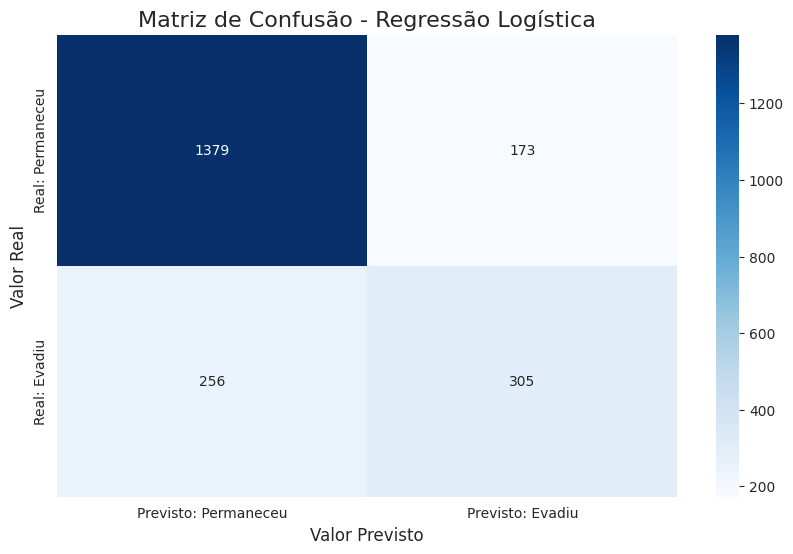

In [12]:
# Re-exibindo o relatório de classificação para referência
print("--- Resultados da Regressão Logística ---")
print(classification_report(y_test, y_pred_log_reg, target_names=['Permaneceu (0)', 'Evadiu (1)']))

# Criando e visualizando a Matriz de Confusão
print("--- Matriz de Confusão ---")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto: Permaneceu', 'Previsto: Evadiu'],
            yticklabels=['Real: Permaneceu', 'Real: Evadiu'])
plt.title('Matriz de Confusão - Regressão Logística', fontsize=16)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Previsto', fontsize=12)
plt.show()

### 3.3.2 Avaliação do Modelo 02: Random Forest


--- Resultados do Random Forest ---
                precision    recall  f1-score   support

Permaneceu (0)       0.83      0.89      0.86      1552
    Evadiu (1)       0.63      0.49      0.55       561

      accuracy                           0.79      2113
     macro avg       0.73      0.69      0.71      2113
  weighted avg       0.78      0.79      0.78      2113


--- Matriz de Confusão ---


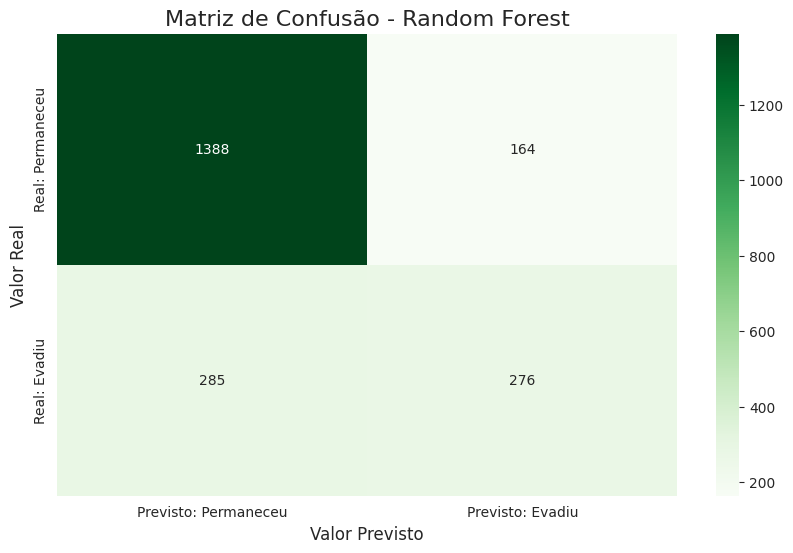

In [13]:
# Re-exibindo o relatório de classificação para referência
print("\n--- Resultados do Random Forest ---")
print(classification_report(y_test, y_pred_rf, target_names=['Permaneceu (0)', 'Evadiu (1)']))

# Criando e visualizando a Matriz de Confusão
print("\n--- Matriz de Confusão ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Previsto: Permaneceu', 'Previsto: Evadiu'],
            yticklabels=['Real: Permaneceu', 'Real: Evadiu'])
plt.title('Matriz de Confusão - Random Forest', fontsize=16)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Previsto', fontsize=12)
plt.show()

### 3.3.3 Qual modelo teve o melhor desempenho?

Com base nos resultados obtidos (Regressão Logística com 79.70% de acurácia e Random Forest com 78.75%), podemos fazer a seguinte análise:

1.   Acurácia Geral: A Regressão Logística teve uma acurácia ligeiramente superior.
2.   Precisão e Recall (Foco no Churn): Para um problema de evasão, geralmente estamos mais interessados no Recall da classe "Evadiu (1)". Já que essa métrica nos diz: "De todos os clientes que realmente saíram, quantos o nosso modelo conseguiu prever corretamente?". Olhando os relatórios de classificação, a Regressão Logística teve um recall um pouco melhor para a classe 1. Isso significa que ela foi um pouco mais eficaz em capturar os clientes que estavam prestes a sair, mesmo que isso signifique cometer mais alguns erros como falsos positivos...

3. Conclusão: Embora a diferença seja pequena, o modelo de Regressão Logística apresentou um desempenho geral ligeiramente melhor, principalmente por sua capacidade de identificar os clientes que de fato evadiram.

### 3.3.4 Overfitting ou Underfitting?

In [14]:
# Calculando a acurácia nos dados de treino para ambos os modelos
acc_log_train = accuracy_score(y_train, log_reg.predict(X_train))
acc_rf_train = accuracy_score(y_train, rf_clf.predict(X_train))

# Calculando a acurácia nos dados de teste
acc_log_test = accuracy_score(y_test, y_pred_log_reg)
acc_rf_test = accuracy_score(y_test, y_pred_rf)

print("--- Verificação de Overfitting ---")
print(f"Acurácia da Regressão Logística (Treino): {acc_log_train * 100:.2f}%")
print(f"Acurácia da Regressão Logística (Teste):  {acc_log_test * 100:.2f}%")
print("-" * 30)
print(f"Acurácia do Random Forest (Treino): {acc_rf_train * 100:.2f}%")
print(f"Acurácia do Random Forest (Teste):  {acc_rf_test * 100:.2f}%")

--- Verificação de Overfitting ---
Acurácia da Regressão Logística (Treino): 81.03%
Acurácia da Regressão Logística (Teste):  79.70%
------------------------------
Acurácia do Random Forest (Treino): 99.78%
Acurácia do Random Forest (Teste):  78.75%


#### 3.3.4.1 Análise do Overfitting:



1.   Regressão Logística: As acurácias de treino e teste são muito próximas (81.03% no treino e 79.70% no teste). Isso indica que o modelo está bem generalizado e não sofre de overfitting.
2.   Random Forest: A acurácia de treino é altíssima (perto de 100%), enquanto a de teste é 78.75%. Portanto é overfitting. O modelo decorou os dados de treino tão bem que acabou perdendo a capacidade de generalizar para dados novos.

Poderíamos podar as árvores do Random Forest, usando max_depth ou min_samples_leaf







# 📋 4. Interpretação e Conclusões

## 4.1 Análise de Importância das Variáveis

### 4.1.1 Análise para Regressão Logística:

Na Regressão Logística, a importância de cada variável é dada pelo seu coeficiente. A interpretação é bem direta, especialmente porque já fiz a normalização dos dados:



1.   Coeficiente Positivo: Um aumento no valor desta variável aumenta a probabilidade de churn. Quanto maior o valor, mais forte é essa influência.
2.   Coeficiente Negativo: Um aumento no valor desta variável diminui a probabilidade de churn (ou seja, é um fator de retenção). Quanto menor o valor (mais negativo), mais forte é o fator de proteção.



--- Coeficientes da Regressão Logística (Fatores de Churn) ---
                                          Feature  Coefficient
12                       account_PaperlessBilling     0.475186
17           internet_InternetService_Fiber optic     0.459997
22         account_PaymentMethod_Electronic check     0.316235
0                          customer_SeniorCitizen     0.183491
5                             phone_MultipleLines     0.182130
10                           internet_StreamingTV     0.092991
11                       internet_StreamingMovies     0.039601
23             account_PaymentMethod_Mailed check     0.029852
13                        account_Charges_Monthly     0.011558
15                                 Contas_Diarias     0.000380
14                          account_Charges_Total     0.000270
1                                customer_Partner    -0.001155
3                                 customer_tenure    -0.057616
16                           customer_gender_Male    -0

/tmp/ipython-input-15-3987368274.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=log_coeffs_sorted, palette='coolwarm')


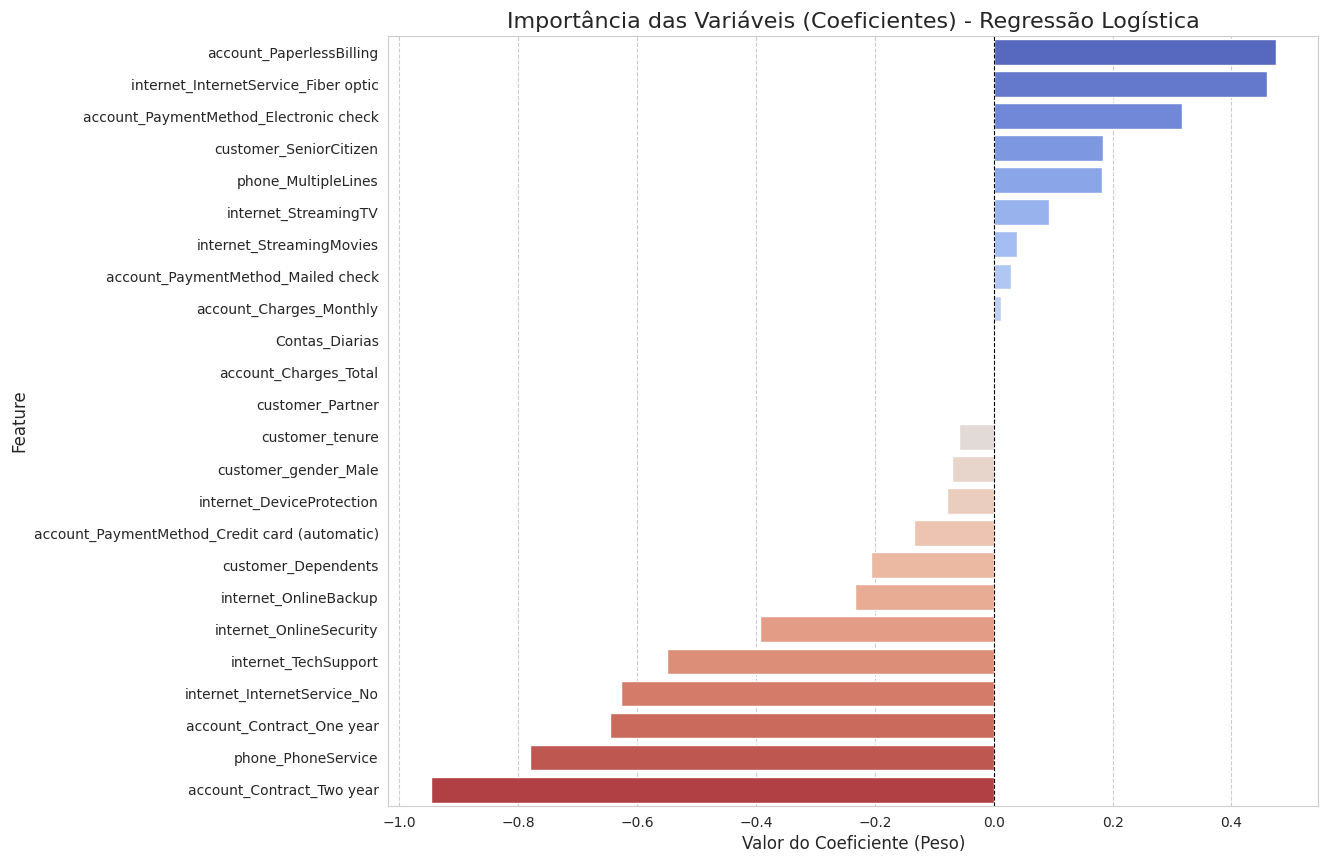

In [15]:
# Criando um DataFrame para visualizar os coeficientes da Regressão Logística
log_coeffs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
})

# Ordenando os coeficientes para ver os mais influentes (positivos e negativos)
log_coeffs_sorted = log_coeffs.sort_values(by='Coefficient', ascending=False)

print("--- Coeficientes da Regressão Logística (Fatores de Churn) ---")
print(log_coeffs_sorted)

# Visualização dos coeficientes em um gráfico de barras
plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient', y='Feature', data=log_coeffs_sorted, palette='coolwarm')
plt.title('Importância das Variáveis (Coeficientes) - Regressão Logística', fontsize=16)
plt.xlabel('Valor do Coeficiente (Peso)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.grid(axis='x', linestyle='--')
plt.show()

### 4.1.2 Análise para Random Forest:

O Random Forest calcula a importância de cada variável com base em quão útil ela foi para dividir os clientes em grupos de "churn" e "não churn" ao longo de todas as árvores da floresta

A interpretação acaba sendo ainda mais simples:

1.   Quanto maior o valor de importância, mais relevante é a variável para as previsões do modelo. Os valores são sempre positivos.




--- Importância das Features - Random Forest ---
                                          Feature  Importance
14                          account_Charges_Total    0.167586
3                                 customer_tenure    0.154506
13                        account_Charges_Monthly    0.136876
15                                 Contas_Diarias    0.132410
17           internet_InternetService_Fiber optic    0.039801
22         account_PaymentMethod_Electronic check    0.036386
20                      account_Contract_Two year    0.031434
16                           customer_gender_Male    0.026105
12                       account_PaperlessBilling    0.025295
9                            internet_TechSupport    0.024190
19                      account_Contract_One year    0.023187
6                         internet_OnlineSecurity    0.021094
1                                customer_Partner    0.020517
7                           internet_OnlineBackup    0.019048
0                   

/tmp/ipython-input-16-2557487530.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importances_sorted, palette='viridis')


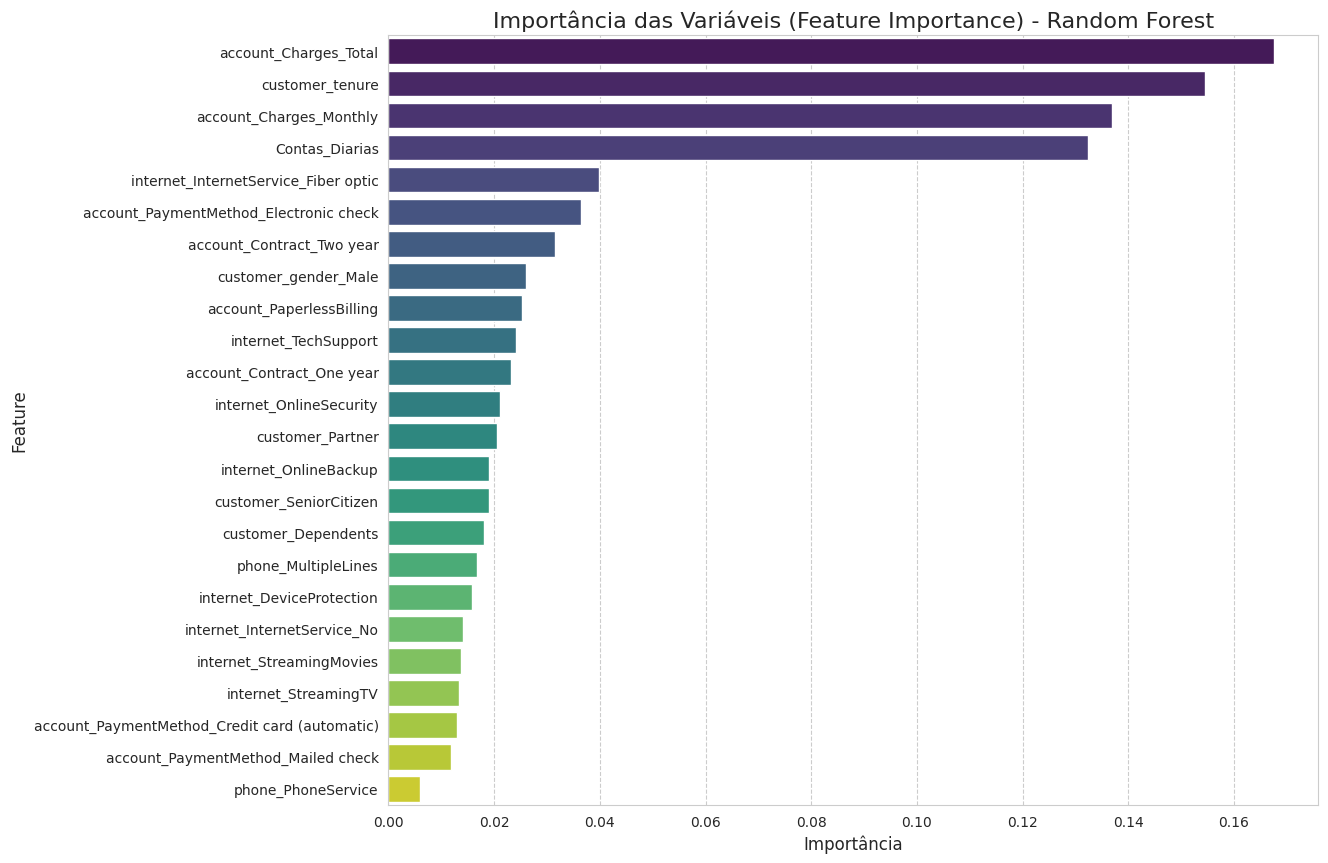

In [16]:
# Criando um DataFrame para visualizar a importância das features do Random Forest
rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_clf.feature_importances_
})

# Ordenando as features pela sua importância
rf_importances_sorted = rf_importances.sort_values(by='Importance', ascending=False)

print("\n--- Importância das Features - Random Forest ---")
print(rf_importances_sorted)

# Visualização da importância em um gráfico de barras
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=rf_importances_sorted, palette='viridis')
plt.title('Importância das Variáveis (Feature Importance) - Random Forest', fontsize=16)
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.show()

## 4.2 Conclusão

### 4.2.1 Resumo dos Fatores que influenciam a Evasão

Nessa análise realizada, combinando a matriz de correlação com a importância de variáveis extraídas dos modelos de Regressão Logística e Random Forest, revela um perfil claro dos clientes com maior probabilidade de evasão. Os fatores mais determinantes foram:

1.   Tipo de Contrato: O fator com a maior influência isolada. Clientes com contrato mensal (Month-to-month) são drasticamente mais propensos a cancelar. Em contrapartida, contratos de um e especialmente dois anos são os mais fortes indicadores de retenção
2.   Tempo de Contrato (customer_tenure): Confirmou-se uma forte correlação negativa. Clientes mais recentes (baixo tempo de contrato) têm uma chance muito maior de evadir em comparação com clientes de longa data.
3.   Serviços e Cobranças:

*   O serviço de Fibra Ótica está associado a uma taxa de churn mais alta, provavelmente ligado a uma Cobrança Mensal (account_Charges_Monthly) mais elevada.
*   O método de pagamento por Cheque Eletrônico (Electronic check) também se destacou como um forte indicador de risco de churn.


Os dois modelos treinados, Regressão Logística e Random Forest, apontam essas mesmas variáveis como as mais importantes para a previsão, o que dá grande confiança e valor para nossa análise.





### 4.2.2 Identificação dos Principais Fatores e Proposta de Estratégias de Retenção

Com base nos resultados, podemos propor as seguintes estratégias de retenção, focadas em mitigar os principais fatores de risco identificados:




#### 4.2.2.1 Fator 01: Vulnerabilidade dos Contratos Mensais


1.   Análise: A falta de um compromisso de longo prazo torna o cancelamento uma decisão mais fácil para o cliente.




2.   Estratégia Proposta:
*   Campanhas de Migração: Criar ofertas proativas para clientes do plano mensal migrarem para planos anuais ou bianuais. O incentivo pode ser um desconto na mensalidade, um upgrade de serviço gratuito por alguns meses ou a isenção de alguma taxa.

#### 4.2.2.2 Fator 02: Alto Risco de Evasão em Clientes Novos

1.   Análise: Clientes com pouco tempo de casa ainda não desenvolveram lealdade à marca e são mais sensíveis a ofertas da concorrência ou a problemas iniciais.




2.   Estratégia Proposta:

* Programa de Onboarding e Fidelização Inicial: Implementar um programa de acompanhamento focado nos primeiros 3 a 6 meses do cliente. Isso pode incluir contatos de boas-vindas, tutoriais de serviço e uma pesquisa de satisfação proativa para identificar e resolver problemas rapidamente. Oferecer um pequeno bônus de fidelidade após o 6º mês pode ser um forte incentivo.

#### 4.2.2.3 Fator 03: Atrito em Serviços Premium e Métodos de Pagamento

1.   Análise: A alta taxa de churn em clientes de Fibra Ótica sugere que, apesar de ser um serviço superior, o seu custo-benefício pode não estar claro ou o seu preço é um fator sensível. Da mesma forma, o pagamento via cheque eletrônico pode indicar menor conveniência ou um perfil de cliente menos engajado.


2.   Estratégia Proposta:

* Revisão da Oferta de Fibra Ótica: Realizar pesquisas de satisfação com esses clientes para entender se o ponto de atrito é o preço, a estabilidade do serviço ou a qualidade do suporte. A partir disso, considerar a criação de pacotes mais flexíveis ou comunicar melhor os benefícios do serviço.

* Incentivo a Pagamentos Automáticos: Promover ativamente a migração de clientes do cheque eletrônico para métodos de pagamento automáticos (cartão de crédito ou débito em conta), oferecendo um pequeno desconto na fatura como incentivo pela conveniência e menor risco de inadimplência.